In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00


In [3]:
# Import the necessary packages for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# Import datetime for datetime processing
from datetime import datetime, timedelta

In [4]:
# Import the CSV file to work with
url = "https://raw.githubusercontent.com/Luke-zm/ev_charge_ana/main/pre_ana_data/updated_combined_ev_charging_data.csv"
leeds_comb_df = pd.read_csv(url)
leeds_comb_df.head()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,charging_cost,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period
0,383322,14Q3User 31,70206,2,31/12/2014,11:25,31/12/2014,11:35,0.57,Elland Road Park and Ride,APT 7kW Dual Outlet,NaN,2014-12-31 11:25:00,2014-12-31 11:35:00,0.166667,Wednesday,Wednesday,morning,morning
1,383031,14Q3User 635,70206,1,30/12/2014,13:58,30/12/2014,15:24,4.52,Elland Road Park and Ride,APT 7kW Dual Outlet,NaN,2014-12-30 13:58:00,2014-12-30 15:24:00,1.433333,Tuesday,Tuesday,afternoon,afternoon
2,381777,14Q3User 38,70201,2,27/12/2014,18:13,27/12/2014,19:08,0.00,Woodhouse Lane Car Park,APT 7kW Dual Outlet,NaN,2014-12-27 18:13:00,2014-12-27 19:08:00,0.916667,Saturday,Saturday,evening,evening
3,380951,14Q3User 629,70208,1,24/12/2014,11:37,24/12/2014,12:06,3.16,Elland Road Park and Ride,APT 7kW Dual Outlet,NaN,2014-12-24 11:37:00,2014-12-24 12:06:00,0.483333,Wednesday,Wednesday,morning,afternoon
4,377470,14Q3User 626,70204,2,18/12/2014,09:29,18/12/2014,11:56,3.16,Woodhouse Lane Car Park,APT 7kW Dual Outlet,NaN,2014-12-18 09:29:00,2014-12-18 11:56:00,2.450000,Thursday,Thursday,morning,morning


In [5]:
leeds_comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   charging_event_id  24224 non-null  int64  
 1   user_id            24224 non-null  object 
 2   cp_id              24224 non-null  int64  
 3   con_num            24224 non-null  int64  
 4   start_date         24224 non-null  object 
 5   start_time         24224 non-null  object 
 6   end_date           23927 non-null  object 
 7   end_time           23927 non-null  object 
 8   total_kwh          23927 non-null  float64
 9   site               24224 non-null  object 
 10  charger_model      24224 non-null  object 
 11  charging_cost      2278 non-null   float64
 12  start_datetime     24224 non-null  object 
 13  end_datetime       23927 non-null  object 
 14  duration_hr        23927 non-null  float64
 15  start_day          24224 non-null  object 
 16  end_day            239

In [6]:
len(leeds_comb_df["charging_event_id"].unique())

24224

In [7]:
len(leeds_comb_df["user_id"].unique())

1897

In [8]:
leeds_comb_df["site"].unique()

array(['Elland Road Park and Ride', 'Woodhouse Lane Car Park',
       'Temple Green Park and Ride', 'Wellington Place ',
       'Torre Road Council Depot', '***TEST SITE*** Charge Your Car HQ'],
      dtype=object)

In [9]:
leeds_comb_df["charger_model"].unique()

array(['APT 7kW Dual Outlet', 'APT Triple Rapid Charger',
       'APT 7kW (Powershare)'], dtype=object)

In [10]:
leeds_comb_df["con_num"].unique()

array([2, 1])

In [11]:
leeds_comb_df["con_num"].unique()

array([2, 1])

In [12]:
# Convert start_date and end_date to datetime format
leeds_comb_df['start_date'] = pd.to_datetime(leeds_comb_df['start_date'], dayfirst=True)
leeds_comb_df['end_date'] = pd.to_datetime(leeds_comb_df['end_date'], dayfirst=True)

# Determine the time range of the dataset
min_date = leeds_comb_df['start_date'].min()
max_date = leeds_comb_df['end_date'].max()

min_date, max_date

(Timestamp('2014-04-10 00:00:00'), Timestamp('2021-04-01 00:00:00'))

# **User Activity Analysis by Time of Day**
This part of the analysis involves counting the number of users during different periods of the day (morning, afternoon, evening, early morning) and visualizing it.

# **Top Sites by User Count**
Here, we identify the top five sites with the highest number of unique users and display this information in a bar chart.

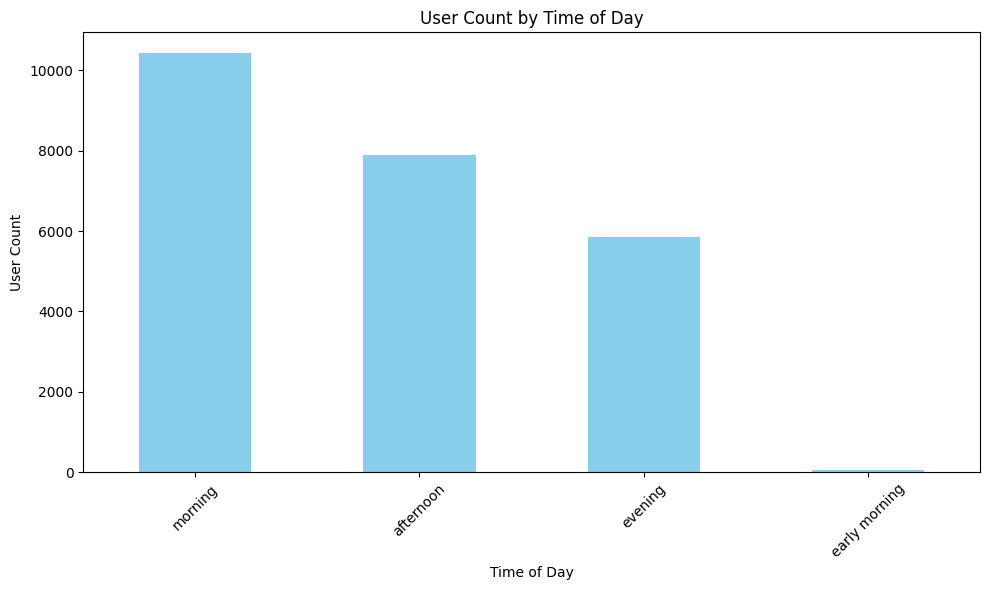

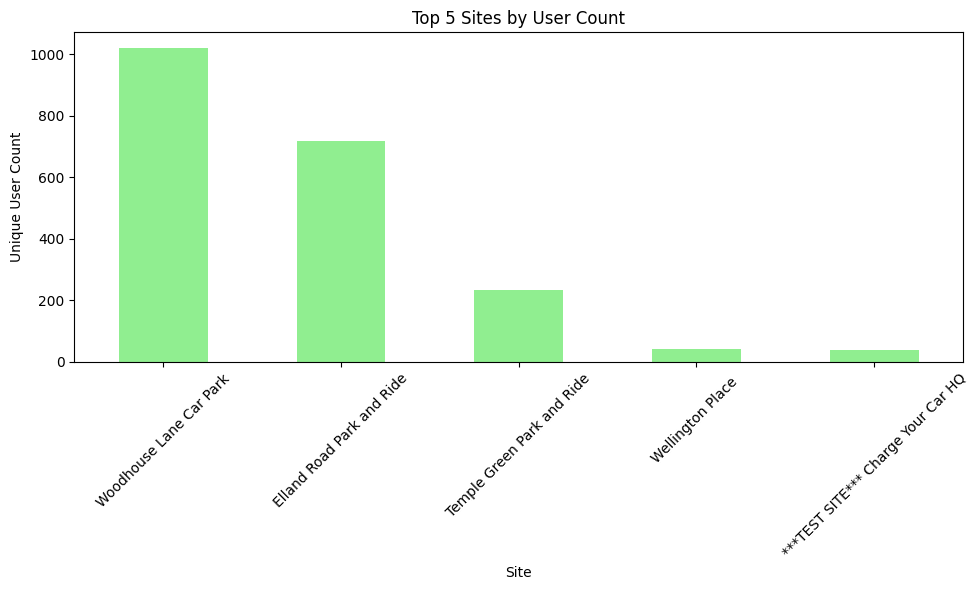

In [14]:
# Analyze user count across different times of the day
# We assume that 'start_period' indicates the period of the day when the charging started.
user_count_by_time = leeds_comb_df['start_period'].value_counts()

# Find the top five sites by the number of unique users
# We assume that 'site' indicates the location of the charging station and 'user_id' indicates the unique users.
top_sites = leeds_comb_df.groupby('site')['user_id'].nunique().sort_values(ascending=False).head(5)

# Plotting the user count by time of day
plt.figure(figsize=(10, 6))
user_count_by_time.plot(kind='bar', color='skyblue')
plt.title('User Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the top five sites by user count
plt.figure(figsize=(10, 6))
top_sites.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Sites by User Count')
plt.xlabel('Site')
plt.ylabel('Unique User Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Calculate the number of users per year and the corresponding user growth rate, and present a graph**

In [ ]:
# Group by year and count distinct users for each year
yearly_users = leeds_comb_df.groupby(leeds_comb_df['start_date'].dt.year)['user_id'].nunique()

# Calculate yearly growth in users
yearly_growth = yearly_users.pct_change() * 100

yearly_users, yearly_growth

(start_date
 2014     31
 2015     76
 2016    182
 2017    262
 2018    376
 2019    590
 2020    320
 2021     60
 Name: user_id, dtype: int64,
 start_date
 2014           NaN
 2015    145.161290
 2016    139.473684
 2017     43.956044
 2018     43.511450
 2019     56.914894
 2020    -45.762712
 2021    -81.250000
 Name: user_id, dtype: float64)

In [ ]:
import plotly.graph_objects as go

# Create a bar chart for yearly users and a line chart for growth rate
fig = go.Figure()

# Bar chart for yearly users
fig.add_trace(go.Bar(
    x=yearly_users.index,
    y=yearly_users,
    name='Number of Users',
    marker_color='skyblue'
))

# Line chart for growth rate
fig.add_trace(go.Scatter(
    x=yearly_growth.index,
    y=yearly_growth,
    name='Growth Rate (%)',
    yaxis='y2',
    mode='lines+markers',
    marker_color='red'
))

# Update layout for dual axis
fig.update_layout(
    title='Yearly Users and Growth Rate',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Users'),
    yaxis2=dict(title='Growth Rate (%)', overlaying='y', side='right'),
    legend=dict(x=0.8, y=1)
)

fig.show()


# **Calculate the number of users per quarter, and present a graph**

In [ ]:
# Convert 'start_date' to datetime format
leeds_comb_df['start_date'] = pd.to_datetime(leeds_comb_df['start_date'], format='%d/%m/%Y')

# Extract year and month from 'start_date'
leeds_comb_df['year'] = leeds_comb_df['start_date'].dt.year
leeds_comb_df['month'] = leeds_comb_df['start_date'].dt.month

# Convert month to quarter
leeds_comb_df['quarter'] = leeds_comb_df['month'].apply(lambda x: (x-1)//3 + 1)

# Group by year and quarter, then count unique users
quarterly_users_leeds = leeds_comb_df.groupby(['year', 'quarter'])['user_id'].nunique().reset_index()

quarterly_users_leeds

,year,quarter,user_id
0,2014,2,7
1,2014,3,10
2,2014,4,19
3,2015,1,19
4,2015,2,25
5,2015,3,25
6,2015,4,30
7,2016,1,28
8,2016,2,61
9,2016,3,58


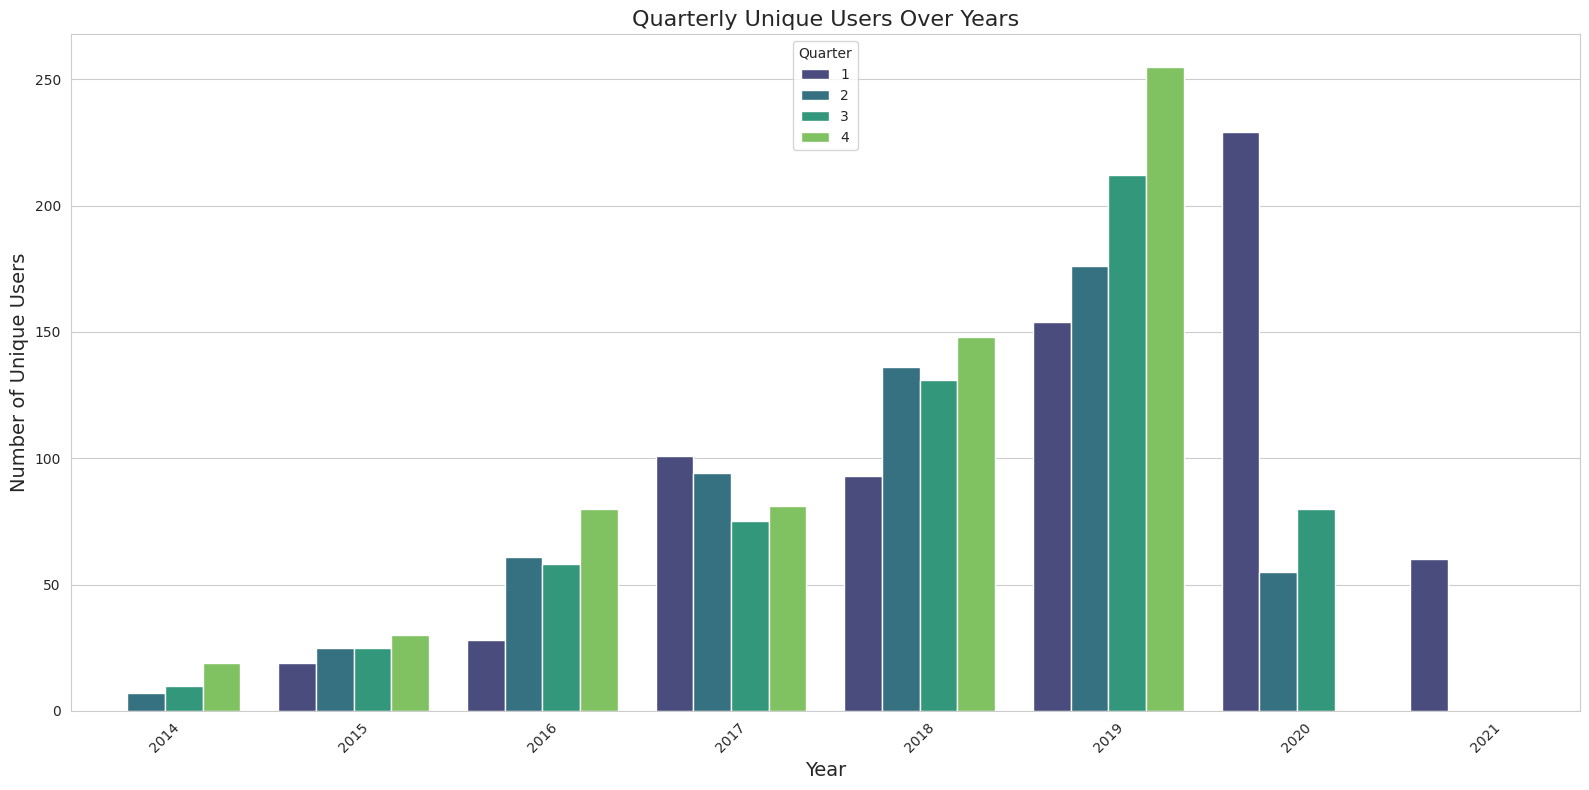

In [ ]:
# Plotting the data as a bar chart
plt.figure(figsize=(16, 8))
sns.barplot(data=quarterly_users_leeds, x='year', y='user_id', hue='quarter', palette='viridis')

# Formatting the plot
plt.title('Quarterly Unique Users Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Unique Users', fontsize=14)
plt.legend(title='Quarter')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# **Comparing the charging situation of users on weekdays (Monday to Friday) and weekends (Saturday, Sunday)**

In [ ]:
# Group by start_day and sum total_kwh for each day
daily_charging = leeds_comb_df.groupby('start_day')['total_kwh'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Calculate average charging for weekdays and weekends
weekday_avg = daily_charging[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].mean()
weekend_avg = daily_charging[['Saturday', 'Sunday']].mean()

daily_charging, weekday_avg, weekend_avg

(start_day
 Monday       44862.569
 Tuesday      48755.292
 Wednesday    47541.006
 Thursday     48786.206
 Friday       43347.006
 Saturday     27579.555
 Sunday       10048.537
 Name: total_kwh, dtype: float64,
 46658.4158,
 18814.046000000002)

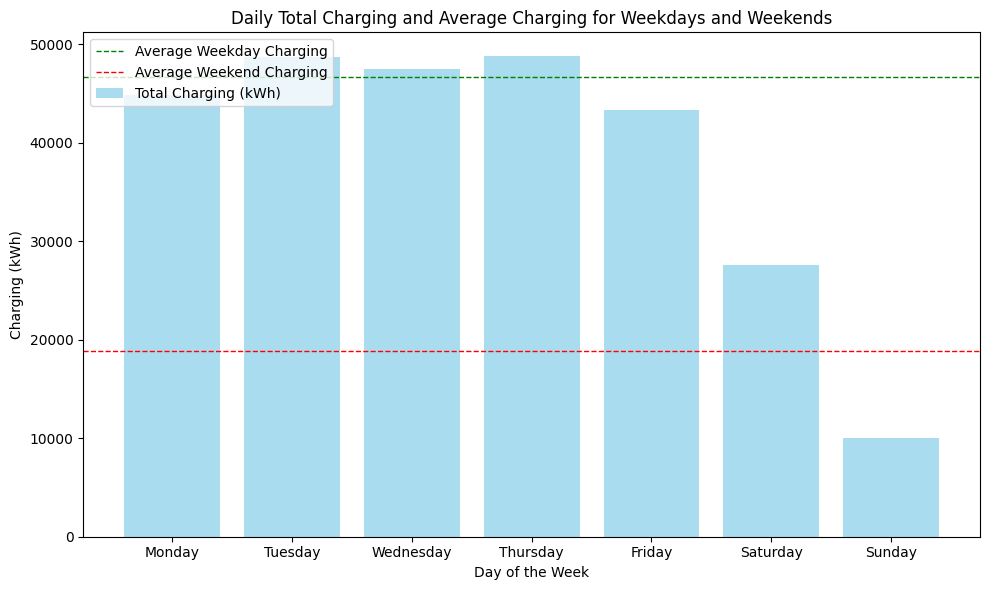

In [ ]:
# Plotting daily total charging and average charging for weekdays and weekends

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(daily_charging.index, daily_charging, color='skyblue', alpha=0.7, label='Total Charging (kWh)')
ax.axhline(weekday_avg, color='green', linestyle='dashed', linewidth=1, label='Average Weekday Charging')
ax.axhline(weekend_avg, color='red', linestyle='dashed', linewidth=1, label='Average Weekend Charging')

ax.set_xlabel('Day of the Week')
ax.set_ylabel('Charging (kWh)')
ax.set_title('Daily Total Charging and Average Charging for Weekdays and Weekends')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# **Using time series prediction models(ARIMA,SARIMAX) to predict future user growth**

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=189.075, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=190.819, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=190.873, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=195.730, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=192.773, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.188 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -92.538
Date:                Fri, 03 Nov 2023   AIC                            189.075
Time:                        12:57:32   BIC                            191.257
Sample:                             0   HQIC                           189.589
                    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



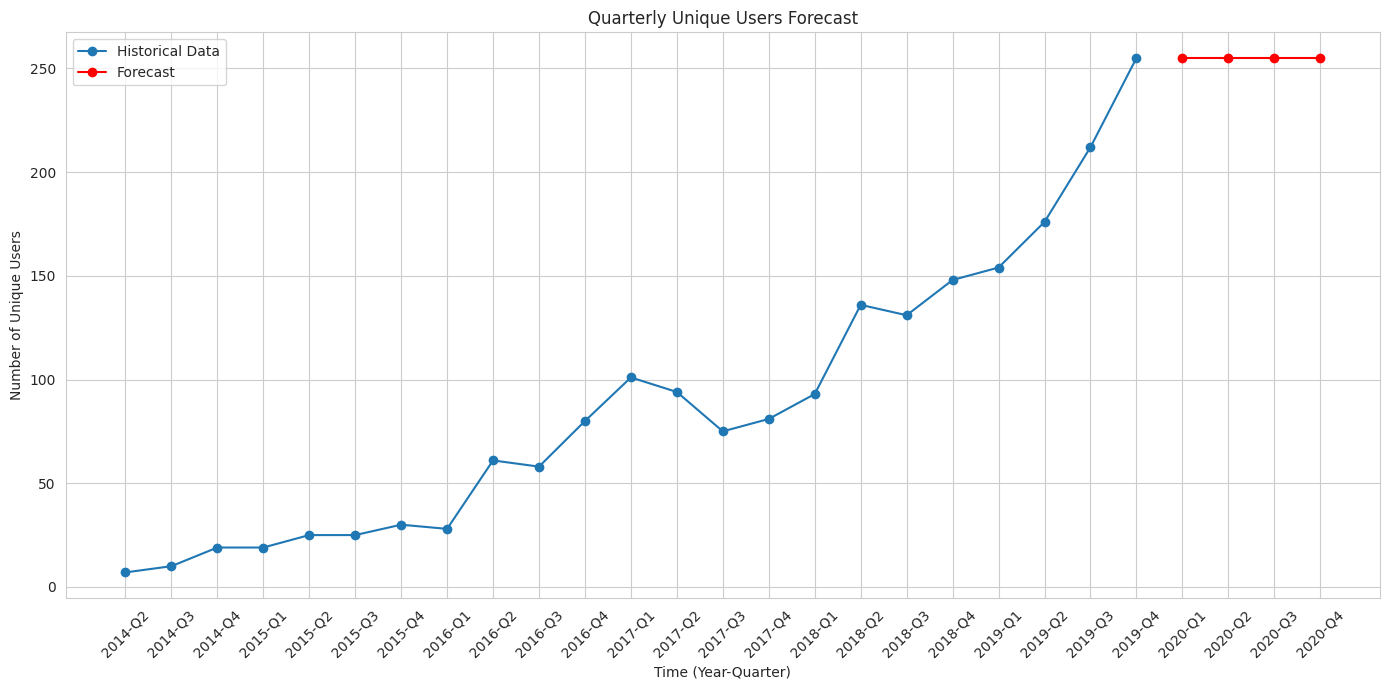

In [ ]:
# 1. Data Preparation
# Filter out 2020 and 2021 data
filtered_data = quarterly_users_leeds[quarterly_users_leeds['year'] < 2020]
# Convert data to time series format
time_series_data = filtered_data.set_index(['year', 'quarter'])['user_id']

# 2. Determine ARIMA parameters using auto_arima
stepwise_fit = auto_arima(time_series_data, trace=True, suppress_warnings=True)

# Display the best parameters
print(stepwise_fit.summary())

# 3. Model Training
model = ARIMA(time_series_data, order=stepwise_fit.order)
fitted_model = model.fit()

# 4. Forecast
forecast_periods = 4  # Forecasting for 4 quarters (1 year)
forecast = fitted_model.forecast(steps=forecast_periods)

# 5. Visualization
# Modify the x-axis data format
historical_x = [f"{year}-Q{quarter}" for year, quarter in time_series_data.index]
forecast_x = [f"2020-Q{i}" for i in range(1, 5)]

plt.figure(figsize=(14, 7))
plt.plot(historical_x, time_series_data.values, label="Historical Data", marker='o')
plt.plot(forecast_x, forecast, label="Forecast", color='red', marker='o')
plt.title('Quarterly Unique Users Forecast')
plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Number of Unique Users')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



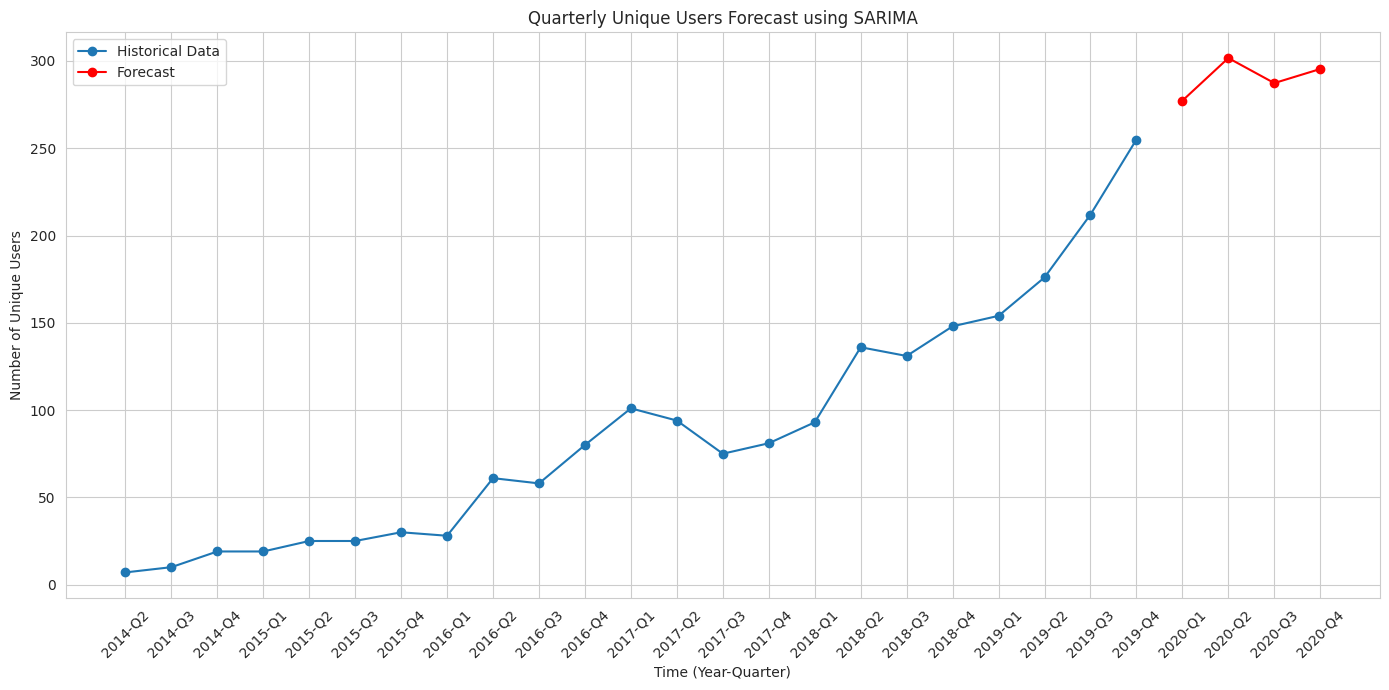

In [ ]:
# 1. Model Training
# Note: Here, I'm using an example order and seasonal_order. You may need to adjust based on your data's characteristics.
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 4)  # S=4 for quarterly data

model = SARIMAX(time_series_data, order=order, seasonal_order=seasonal_order)
fitted_model = model.fit(disp=False)

# 2. Forecast
forecast_periods = 4  # Forecasting for 4 quarters (1 year)
forecast = fitted_model.get_forecast(steps=forecast_periods).predicted_mean

# 3. Visualization
# Modify the x-axis data format
historical_x = [f"{year}-Q{quarter}" for year, quarter in time_series_data.index]
forecast_x = [f"2020-Q{i}" for i in range(1, 5)]

plt.figure(figsize=(14, 7))
plt.plot(historical_x, time_series_data.values, label="Historical Data", marker='o')
plt.plot(forecast_x, forecast, label="Forecast", color='red', marker='o')
plt.title('Quarterly Unique Users Forecast using SARIMA')
plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Number of Unique Users')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
